# Pen's Parade and Pengrams

This notebook explores the concepts of Pen's Parade and Pengrams, which are graphical methods used to depict income inequality, both at the individual level and in spatial analysis. The Pen's Parade, named after economist Jan Pen, illustrates the distribution of income by visualizing individuals as different heights proportional to their income. This notebook adapts the Pen's Parade for spatial data, treating regions as units and showing the spatial distribution of income levels across different areas. Through this approach, we can visualize income inequality both geographically and statistically, allowing for a clearer understanding of wealth concentration across regions. Additionally, the notebook demonstrates how to create weighted Pengrams, which adjust the visual representation based on factors such as population size.

Although we illustrate these methods using income, it is important to highlight that the Pen's Parade and Pengram can be applied not only to income but to other variables like wealth, education levels, or even health metrics.

## Data
To illustrate the concepts of Pen's Parade and Pengrams, this notebook utilizes data on per capita Gross Domestic Product (GDP) for Mexico's 32 states, covering the decades from 1940 to 2000. Per capita GDP is calculated by dividing the total GDP of a region by its population, providing a measure of the average economic output per person. This metric serves as a useful indicator of the standard of living and economic development across different states. By analyzing this data, we can effectively visualize and assess income inequality and economic disparities both over time and across various regions within Mexico.


In [17]:
import geopandas as gpd

In [18]:
gdf = gpd.read_file("weighted.shp")

In [19]:
gdf.head()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,TEST,Name_1,Population,NAMEp,populati_1,Y2000,y2000_1,p,State,geometry
0,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,5.0,Aguascalientes,944285,Aguascalientes,944285,2.623413e+10,27782.0,0.009647,Aguascalientes,"POLYGON ((-101.8462 22.01176, -101.9653 21.883..."
1,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,1.0,Querétaro de Arteaga,1404306,Baja California Norte,1404306,4.192556e+10,29855.0,0.014347,Baja California Norte,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
2,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,2.0,Baja California Sur,424041,Baja California Sur,424041,1.106874e+10,26103.0,0.004332,Baja California Sur,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
3,15,5.016584e+10,MX04,Campeche,1575361.146,1.239620e+07,5016583.723,3758.0,4929.0,5925.0,...,15.0,Campeche,690689,Campeche,690689,2.497739e+10,36163.0,0.007056,Campeche,"MULTIPOLYGON (((-91.83446 18.63805, -91.84195 ..."
4,22,7.339157e+10,MX05,Chiapas,1477195.199,1.813538e+07,7339157.376,2934.0,4138.0,5280.0,...,22.0,Chiapas,3920892,Chiapas,3920892,3.404903e+10,8684.0,0.040057,Chiapas,"POLYGON ((-91.4375 17.24111, -91.35278 17.1763..."


## Pen's Parade


The parade proceeds from the poorest individuals to the wealthiest, where those with the lowest incomes appear as very short figures, while the wealthiest individuals tower above the rest. This visualization allows us to see the stark disparities in income distribution, often revealing that a large portion of the population has much lower incomes, with only a small percentage earning exceptionally high amounts. As the parade progresses, there is usually a gradual increase in height, but the final segment often shows a dramatic spike, symbolizing the extreme concentration of wealth in the hands of a few.

This method is particularly powerful because it combines a vivid, intuitive picture with a clear, ordered progression of income distribution. The Pen’s Parade makes inequality tangible by visually showing not only the presence of inequality but also its scale and extremity. It emphasizes the vast differences between individuals at the lower and upper ends of the income spectrum, making it clear how much of the total wealth is held by the top earners. This graphical representation is useful in discussions about income inequality as it demonstrates the inequality's real-world impact, illustrating the imbalance in a way that is more immediate and relatable than abstract statistical measures alone, such as the Gini coefficient.

For spatial analysis, the regions take the place of individuals, as the focus is on the spatial distribution of incomes, rather than the distribution of individual incomes.

In [20]:
from inequality.pen import pengram, pen

In [21]:
col = "PCGDP2000"
weight = "p"
name = "NAME"
figsize = (16, 9)

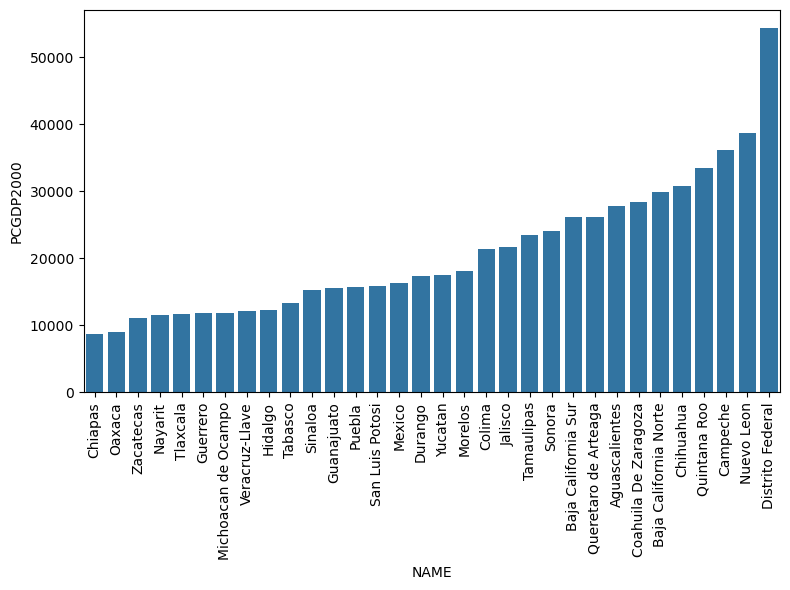

In [22]:
p = pen(gdf, col, name)

As can be seen in this Pen's Parade for 2000, the sharp rise at the end signifies concentration of income among the highest income states, suggesting high income inequality.

### Pen Parade Options

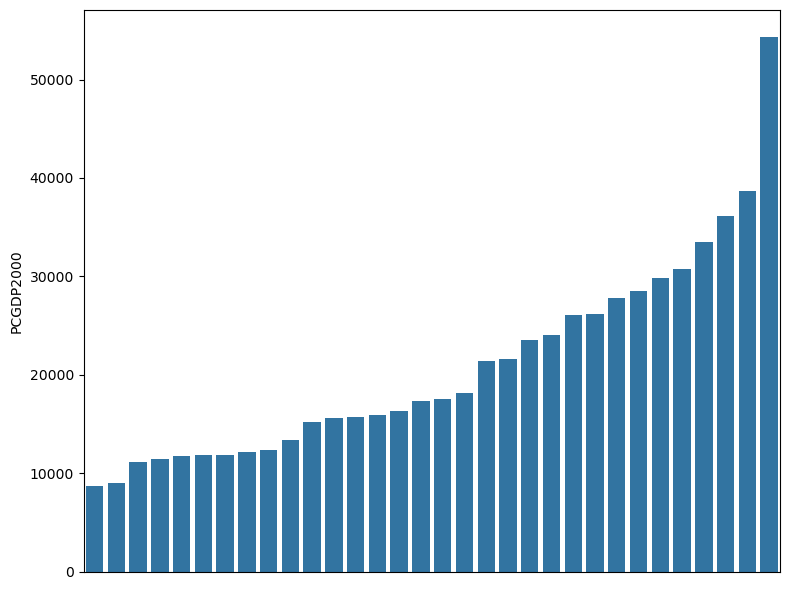

In [23]:
p = pen(gdf, col, name, xticks=False)

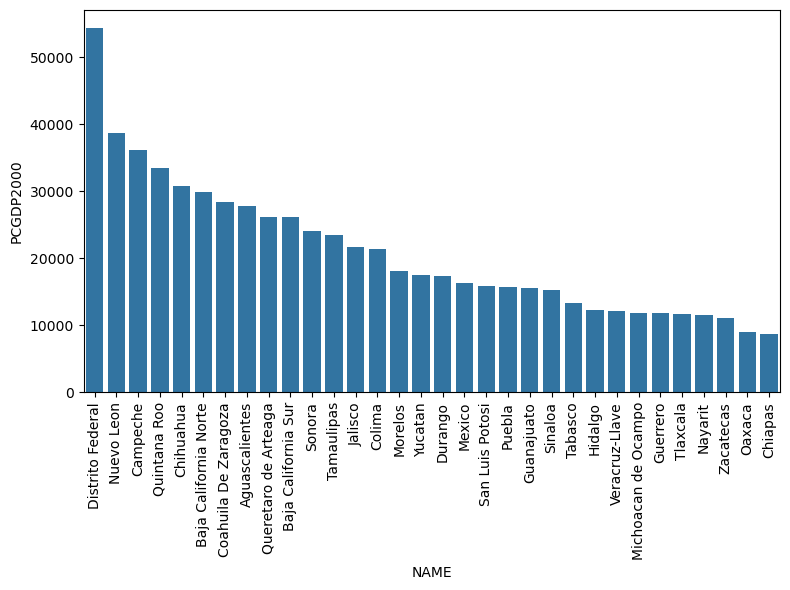

In [24]:
p = pen(gdf, col, name, ascending=False)

## Weighted Pen's Parade

Weighting the Pengram by population size provides a more nuanced understanding of inequality. Without weighting, each state’s income distribution may obscure the fact that some regions have larger populations, which can distort how we perceive inequality on a per-person basis.

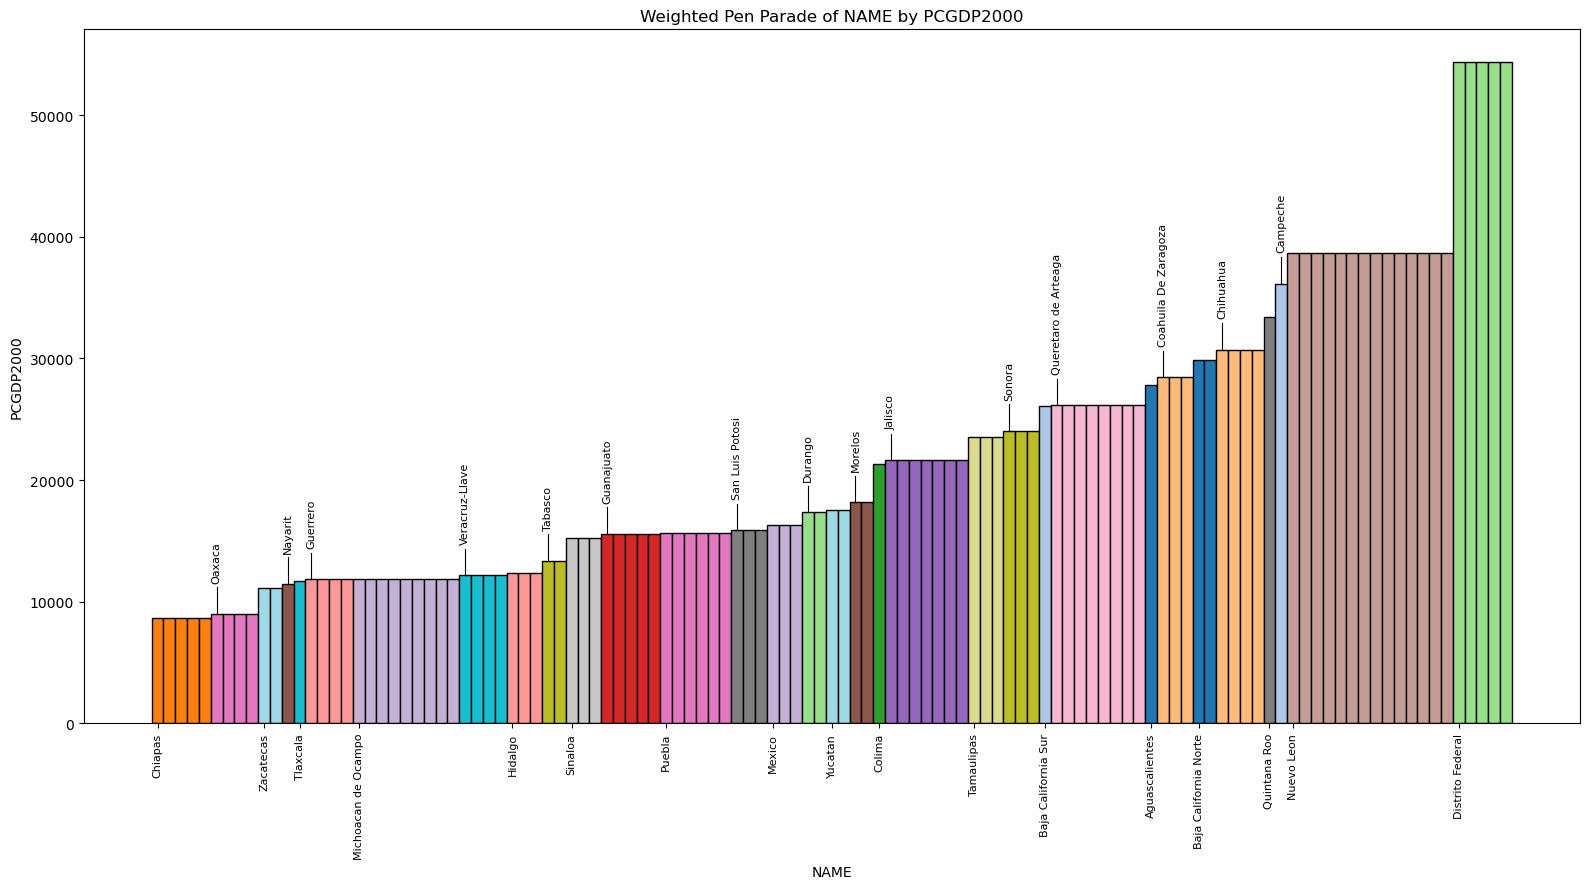

In [25]:
wp = pen(gdf, col, name, weight=weight, figsize=figsize)

The weighted Pen's Parade introduces complexity but has some inherent limitations. A key drawback is that it assumes no inequality exists among individuals within each state, as everyone is assigned the same income level. Consequently, this leads to the assumption that in comparing two states with different per capita incomes, the poorest individuals in the wealthier state would still be wealthier than the richest individuals in the poorer state. This assumption conflicts with real-world data ([Rey, 2024](https://github.com/sjsrey/spatial_inequality?tab=readme-ov-file)).

## Pengram

While the Pen's Parade effectively shows where individual states fall within the overall income distribution, it overlooks the geographic dimension of income inequality. The **Pengram** addresses this by extending the Pen's Parade to incorporate a spatial component, combining the income distribution with a choropleth map. This dual approach allows us to visualize not only the statistical distribution of incomes but also how these incomes are geographically distributed across different regions. By blending both perspectives, the Pengram provides a more comprehensive view of inequality, linking spatial and statistical elements in a single visualization.

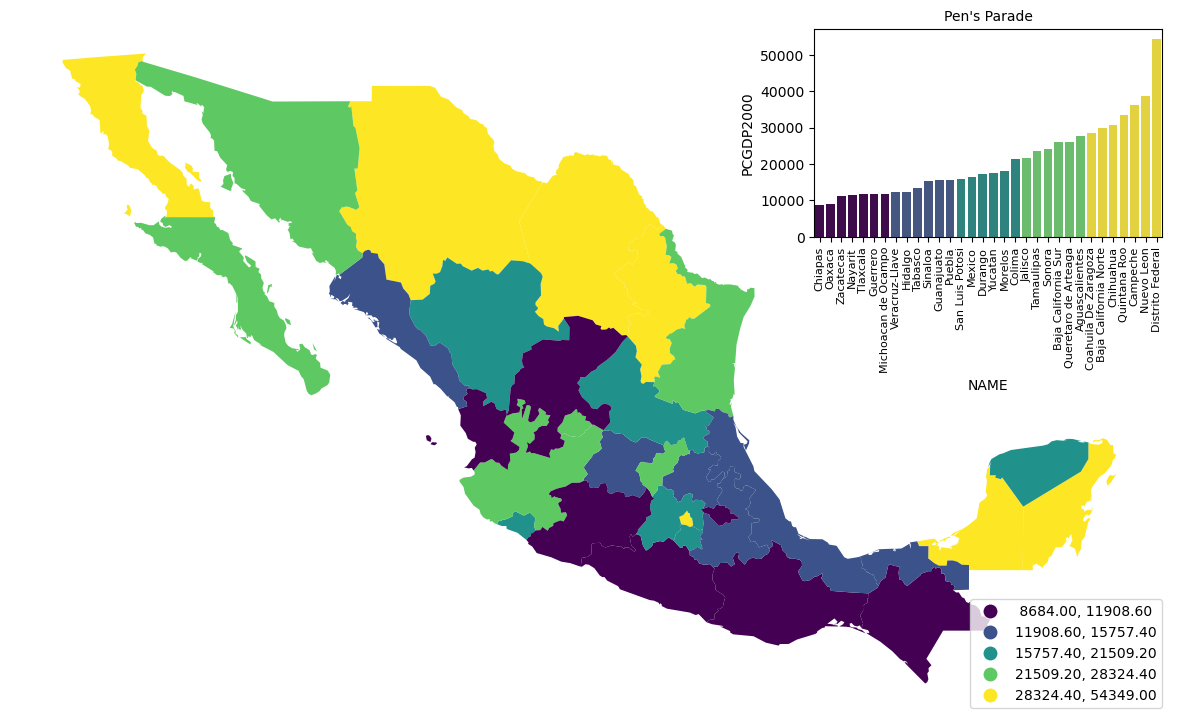

In [26]:
pengram(gdf, col, name, figsize=figsize);

By using a Pengram, we can identify regions that may be economically lagging and those where income is concentrated. 
we can observe that wealthier regions are primarily concentrated in the northern and central states, while southern states have significantly lower income levels, which suggests regional economic disparity.

This dual analysis of statistical and spatial distribution allows policymakers and researchers to target interventions more effectively.

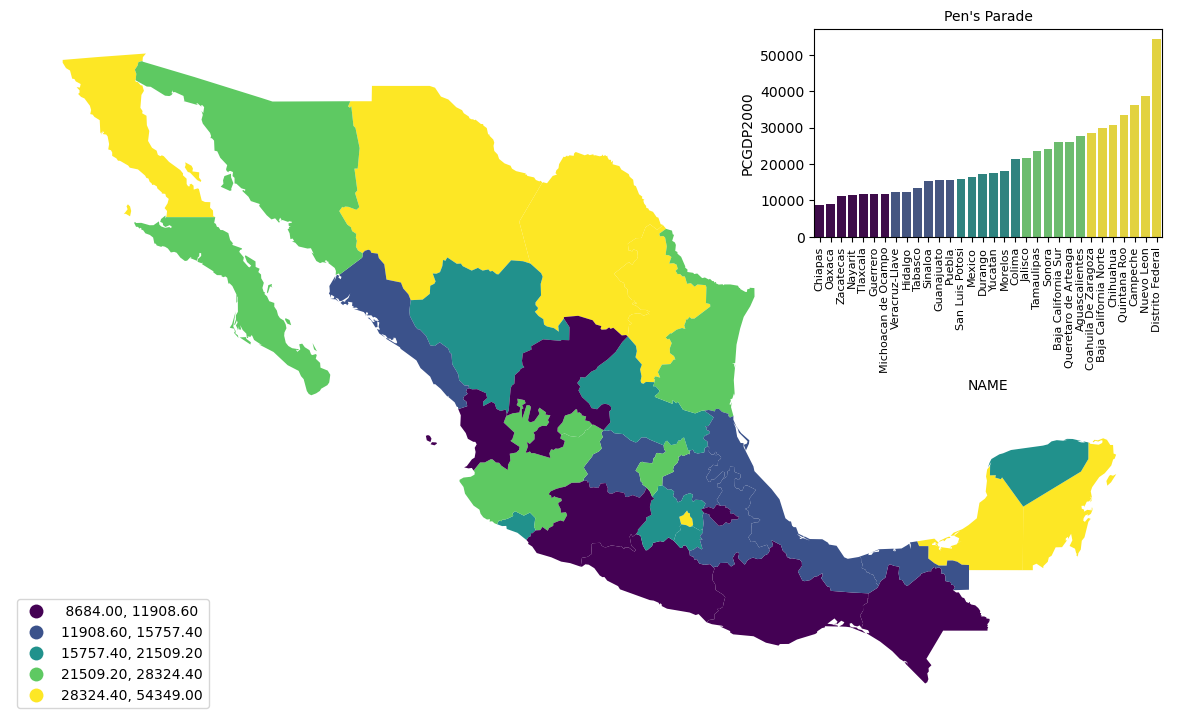

In [27]:
pengram(gdf, col, name, figsize=figsize, leg_pos="lower left");

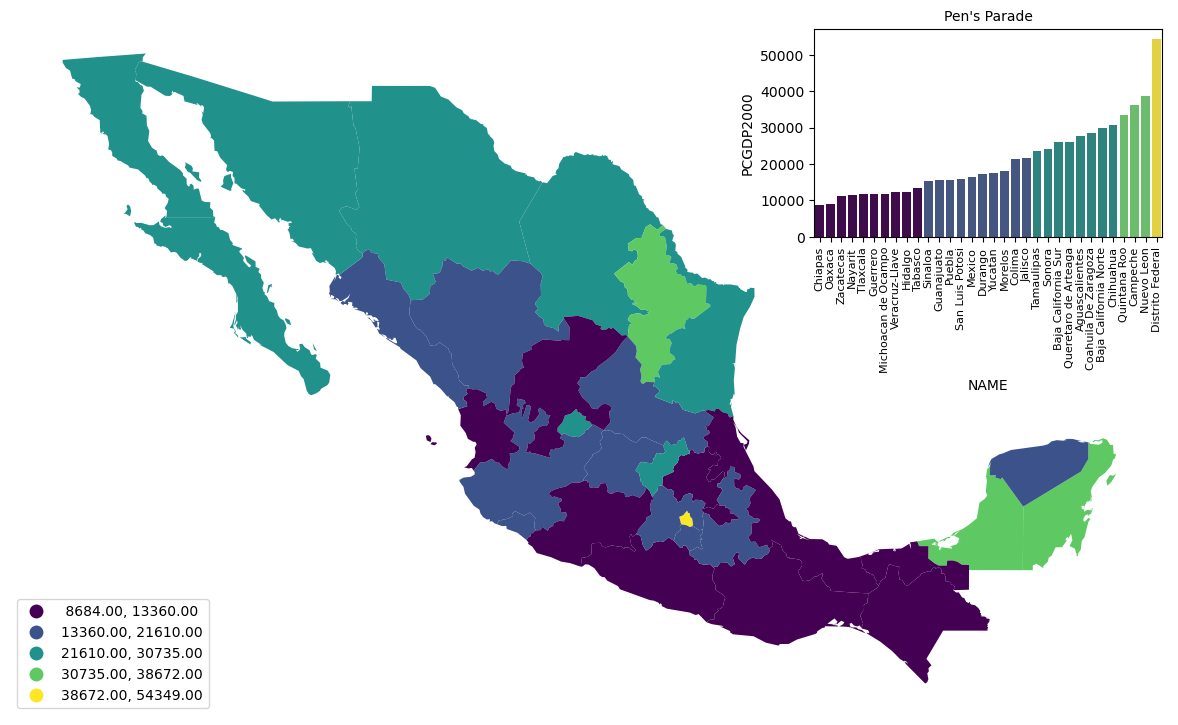

In [28]:
pengram(gdf, col, name, figsize=figsize, leg_pos="lower left", scheme="FisherJenks");

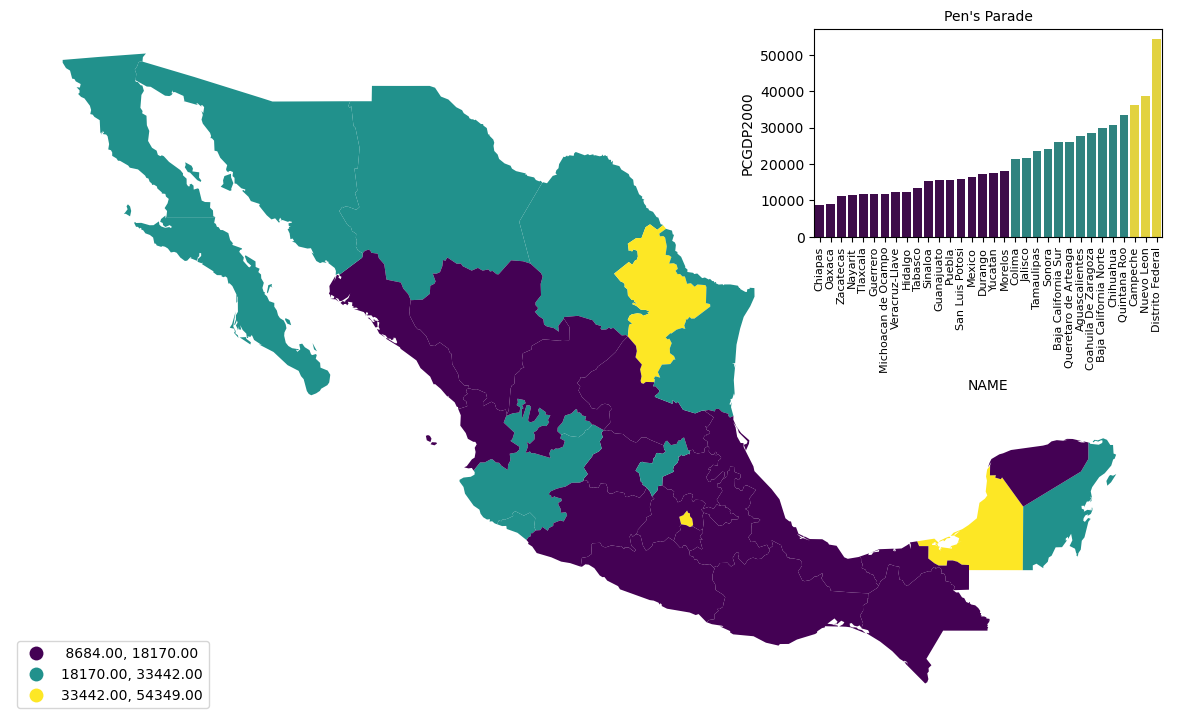

In [29]:
pengram(
    gdf, col, name, figsize=figsize, leg_pos="lower left", scheme="FisherJenks", k=3
);

### Queries

The Pengram enables users to search for and highlight specific subsets of areas, both on the map and within the Pengram itself. 
This feature allows users to focus on specific regions of interest, making it easier to analyze economic disparities in targeted areas. For instance, searching for states like Chiapas and Campeche, which appear far apart in the Pen's Parade due to their significant income differences, but are actually contiguous on the map, highlights abrupt spatial disparities. This helps illustrate how neighboring regions can experience vastly different levels of income, underscoring the complexity of geographic inequality.


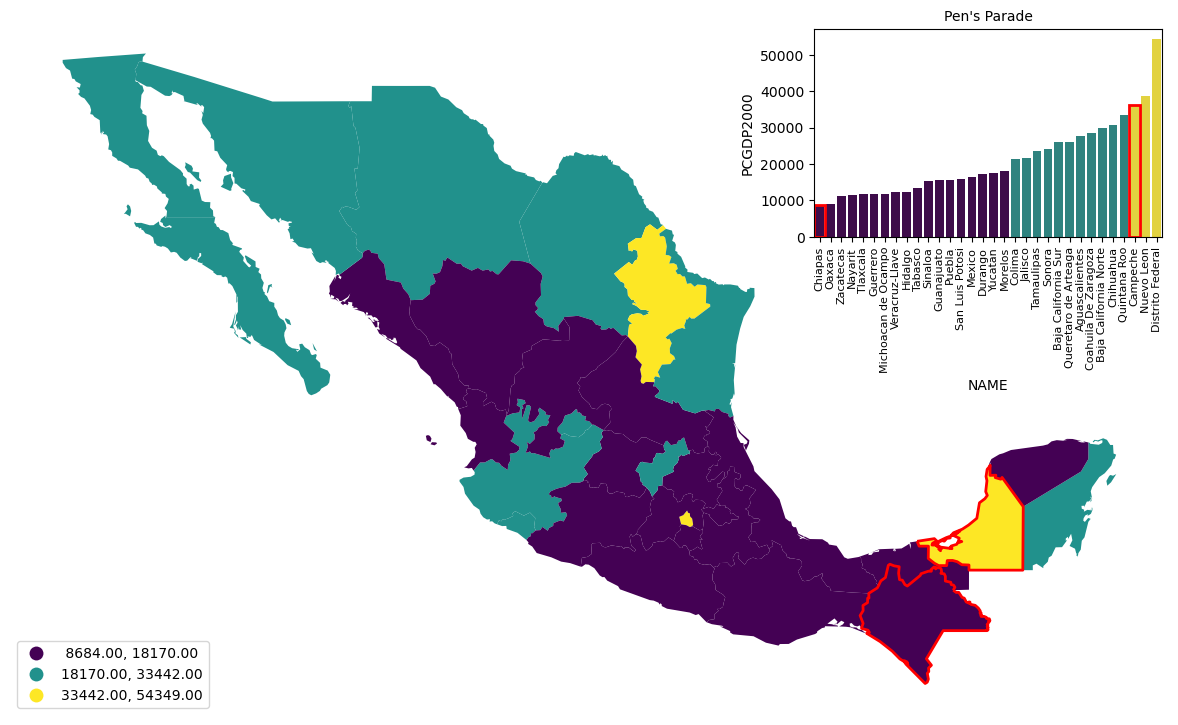

In [30]:
pengram(
    gdf,
    col,
    name,
    figsize=figsize,
    leg_pos="lower left",
    scheme="FisherJenks",
    k=3,
    query=["Chiapas", "Campeche"],
);

## Subplotting

Both the Pen's Parade and Pengram are implemented using Matplotlib objects. By combining various visualizations—such as KDE plots, choropleth maps, and the Pen’s Parade—we can examine multiple aspects of inequality in a single view. For example, this approach allows us to compare the distribution of per capita GDP across states while simultaneously observing how it corresponds to their geographic locations. Additionally, these plots can be embedded in a single figure, making them easy to include in reports or papers.

In [31]:
import seaborn as sns

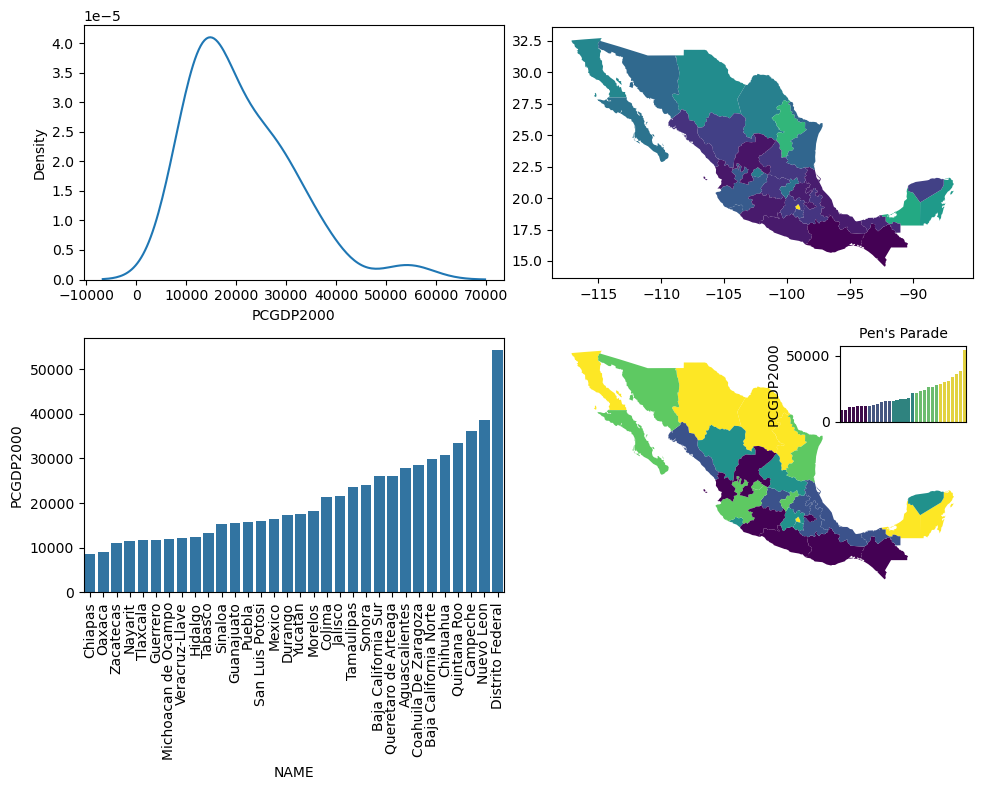

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={"height_ratios": [1, 1]})
ax0, ax1, ax2, ax3 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

sns.kdeplot(data=gdf, x="PCGDP2000", ax=ax0)
gdf.plot("PCGDP2000", ax=ax1)
pen(gdf, col, name, ax=ax2)
pengram(gdf, col, name, xticks=False, legend=False, ax=ax3);